#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

##Average Fare ($) Per City
##Total Number of Rides Per City
##Total Number of Drivers Per City
##City Type (Urban, Suburban, Rural)

#In addition, you will be expected to produce the following three pie charts:

##% of Total Fares by City Type
##% of Total Rides by City Type
##% of Total Drivers by City Type

#As final considerations:

##You must use the Pandas Library and the Jupyter Notebook.
##You must use the Matplotlib libraries.
##You must include a written description of three observable trends based on the data.
##You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend ##Labels, Wedge Percentages, and Wedge Labels.
##Remember when making your plots to consider aesthetics!
###You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your ###plot and pie charts.
###When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
###When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

#You must include an exported markdown version of your Notebook called  README.md in your GitHub ##repository.
#See Example Solution for a reference on expected format.

In [141]:
#Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly as pl
import cufflinks as cf
import plotly.tools as tls
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot
import plotly.graph_objs as go
pl.offline.init_notebook_mode(connected=True)
pl.tools.set_credentials_file(username='davidhoebbel', api_key='obcfaofD1NR2Oa9kiS3D')

In [142]:
# Read CSV
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")

In [143]:
#Print Abridged CSV Data Tables
city_data.set_index('city')
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [144]:
#Print abridged CSV data tables
ride_data.set_index('city')
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [145]:
# Merge data tables on city
#pd.join(other, lsuffix='city', rsuffix='city')
#Need to get into jupyter from earlier folder
uber_merge = pd.merge(city_data, ride_data, on="city")
uber_merge.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [146]:
#Groupby to find average per city
##Average Fare ($) Per City
city_fare = uber_merge.groupby(['city'], as_index=False)
city_fare["fare"].mean()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579
5,Arnoldview,25.106452
6,Campbellport,33.711333
7,Carrollbury,36.606000
8,Carrollfort,25.395517
9,Clarkstad,31.051667


In [147]:
##Total Number of Rides Per City
ride_count = uber_merge.groupby(['city'], as_index=False)
ride_count["ride_id"].count()

,city,ride_id
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19
5,Arnoldview,31
6,Campbellport,15
7,Carrollbury,10
8,Carrollfort,29
9,Clarkstad,12


In [148]:
##Total Number of Drivers Per City
city_drivers = uber_merge.groupby(['city'], as_index=False)
city_drivers["driver_count"].mean()

,city,driver_count
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49
5,Arnoldview,41
6,Campbellport,26
7,Carrollbury,4
8,Carrollfort,55
9,Clarkstad,21


In [149]:
#uber_merge
#city_fare
#ride_count
#city_drivers
#merge into single table
#pd.merge(uber_merge, city_fare, ride_count, city_drivers, on=["Index"], how='inner',suffixes=('_fare','_count','_drivers'))


In [150]:
#Consolidate groupby values into single table for charting purposes

f = {'fare':['mean'], 'ride_id':['count'], 'driver_count':['mean']}

merged_df = uber_merge.groupby('city').agg(f)
merged_df.head()

,fare,ride_id,driver_count
,mean,count,mean
city,,,
Alvarezhaven,23.928710,31,21
Alyssaberg,20.609615,26,67
Anitamouth,37.315556,9,16
Antoniomouth,23.625000,22,21
Aprilchester,21.981579,19,49


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~davidhoebbel/0 or inside your plot.ly account where it is named 'bubblechart'


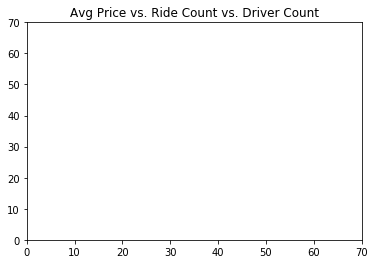

In [178]:
# Use DataFrame.plot() in order to create a bar chart of the data
merged_df.iplot(kind='bubble', x='fare', y='ride_id', size='driver_count', xTitle='Avg Fare', yTitle='Rider Count',
             filename='bubblechart')

# Set a title for the chart
plt.title("Avg Price vs. Ride Count vs. Driver Count")

axes = plt.gca()
axes.set_xlim([0,70])
axes.set_ylim([0,70])

plt.show()

In [209]:
#Consolidate groupby values into single table for charting purposes

m = {'fare':['sum'], 'ride_id':['count'], 'driver_count':['mean']}

merged_df2 = uber_merge.groupby(['type']).agg(m)
merged_df2.head()

,fare,ride_id,driver_count
,sum,count,mean
type,,,
Rural,4255.09,125,5.816000
Suburban,20335.69,657,14.809741
Urban,40078.34,1625,39.692923


In [210]:
##City Type (Urban, Suburban, Rural)
#In addition, you will be expected to produce the following three pie charts:
##% of Total Fares by City Type
##% of Total Rides by City Type
##% of Total Drivers by City Type
merged_df2['fare %'] = (merged_df2['fare'])/(merged_df2['fare'].sum())
merged_df2['ride %'] = (merged_df2['ride_id'])/(merged_df2['ride_id'].sum())
merged_df2['driver %'] = (merged_df2['driver_count'])/(merged_df2['driver_count'].sum())
merged_df2

,fare,ride_id,driver_count,fare %,ride %,driver %
,sum,count,mean,,,
type,,,,,,
Rural,4255.09,125,5.816000,0.065798,0.051932,0.096421
Suburban,20335.69,657,14.809741,0.314458,0.272954,0.245525
Urban,40078.34,1625,39.692923,0.619745,0.675114,0.658054


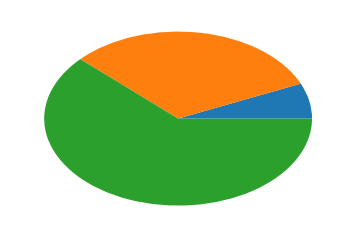

In [227]:
# Fare % by city type
plt.pie(merged_df2['fare %'])
plt.show()

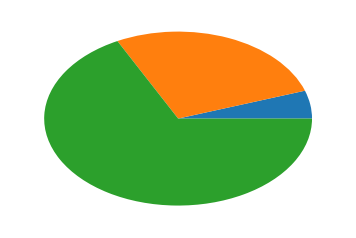

In [228]:
# ride % by city type
plt.pie(merged_df2['ride %'])
plt.show()

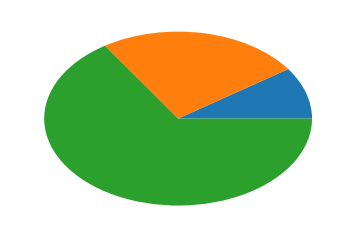

In [229]:
# driver % by city type
plt.pie(merged_df2['driver %'])
plt.show()

In [ ]:
#Observable Trends
#1. Higher average fares associated with cities that have smaller amounts of Uber drivers
#2. Rider count and driver count are positively correlated
#3. Urban cities have more riders, drivers and a higher share of the overall fares. This is followed by Suburban then Rural cities.